In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import time

import sys

from scipy import interpolate

import sys
sys.path.insert(0,'/home/hungjinh/Research/Pk_hydro/code/gen_Pk')
from Pk_nbkits_illustris import *

from scipy.interpolate import InterpolatedUnivariateSpline as spline


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
TbPk_hydro = Table.read("Pk_ill1_hydro_shotcor.fits")
TbPk_dmo   = Table.read("Pk_ill1_DMO_shotcor.fits")
TblogPkRatio = Table.read("logPkRatio_ill1.fits")

In [37]:
def load_Pk(filename,cat='CIC',iskvalue=False):
    filedir = "/home/hungjinh/Research/Pk_hydro/data/Pk_data_"+cat+"/illustris/raw_data/"
    Pkraw = load_pickle(filedir+filename)
    Pkvalue = Pkraw['power']-Pkraw['shotnoise']
    
    if iskvalue == True:
        return Pkraw['k']
    else:
        return Pkvalue

k2048 = load_Pk("Pk_ill1_135_dmo2048.pickle",iskvalue=True)
k1024 = load_Pk("Pk_ill1_135_dmo1024.pickle",iskvalue=True)
k512  = load_Pk("Pk_ill1_135_hydro512_gas.pickle",iskvalue=True)
k256  = load_Pk("Pk_ill1_135_hydro256_gas.pickle",iskvalue=True)
k128  = load_Pk("Pk_ill1_135_hydro128_gas.pickle",iskvalue=True)


# dmo sims
PkCIC_dmo_2048    = load_Pk("Pk_ill1_135_dmo2048.pickle")
PkCIC_dmo_1024    = load_Pk("Pk_ill1_135_dmo1024.pickle")
PkCIC_dmo_1024_aF = load_Pk("Pk_ill1_135_dmo1024_aF.pickle")

PkTSC_dmo_1024    = load_Pk("Pk_ill1_135_dmo_TSC.pickle",cat='TSC')

# hydro sims
PkCIC_hydro_2048    = load_Pk("Pk_ill1_135_hydro2048.pickle")
PkCIC_hydro_1024    = load_Pk("Pk_ill1_135_hydro1024.pickle")
PkCIC_hydro_1024_aF = load_Pk("Pk_ill1_135_hydro1024_aF.pickle")
PkCIC_hydro_512    = load_Pk("Pk_ill1_135_hydro512.pickle")
PkCIC_hydro_256    = load_Pk("Pk_ill1_135_hydro256.pickle")


PkTSC_hydro_1024    = load_Pk("Pk_ill1_135_hydro_TSC.pickle",cat='TSC')
PkTSC_hydro_512     = load_Pk("Pk_ill1_135_hydro512.pickle",cat='TSC')
PkTSC_hydro_256     = load_Pk("Pk_ill1_135_hydro256.pickle",cat='TSC')


# hydro single species

PkCIC_gas_1024 = load_Pk("Pk_ill1_135_hydro_gas.pickle")
PkCIC_gas_512 = load_Pk("Pk_ill1_135_hydro512_gas.pickle")
PkCIC_gas_256 = load_Pk("Pk_ill1_135_hydro256_gas.pickle")
PkCIC_gas_128 = load_Pk("Pk_ill1_135_hydro128_gas.pickle")

PkTSC_gas_1024   = load_Pk("Pk_ill1_135_hydro1024_gas.pickle",cat='TSC')
PkTSC_gas_512    = load_Pk("Pk_ill1_135_hydro512_gas.pickle",cat='TSC')
PkTSC_gas_256    = load_Pk("Pk_ill1_135_hydro256_gas.pickle",cat='TSC')


PkCIC_dm_1024 = load_Pk("Pk_ill1_135_hydro_dm.pickle")
PkCIC_dm_512 = load_Pk("Pk_ill1_135_hydro512_dm.pickle")
PkCIC_dm_256 = load_Pk("Pk_ill1_135_hydro256_dm.pickle")
PkCIC_dm_128 = load_Pk("Pk_ill1_135_hydro128_dm.pickle")

PkCIC_bh_1024   = load_Pk("Pk_ill1_135_hydro_bh.pickle")
PkCIC_star_1024 = load_Pk("Pk_ill1_135_hydro_star.pickle")

# Plot

In [12]:
Lbox =  75.    # simulation box for eagle is 67.77 Mpc/h

def cal_kNy(resol):
    Lbox =  75.
    return np.pi*resol/Lbox

N1024 = len(k1024)
N512 = len(k512)
N256 = len(k256)
N128 = len(k128)

(0.998, 1.005)

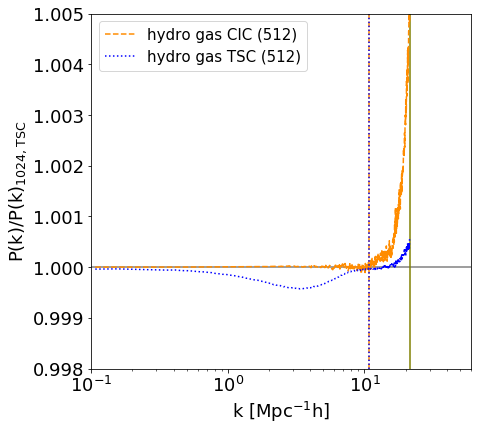

In [38]:
fig=plt.figure(figsize=(6.2,5.8))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.1 ,0.13,0.85,0.85])

ax1.axhline(y=1.0,c='gray',ls='-',lw=1.5)

ax1.axvline(x=cal_kNy(1024)/2., color='olive', linestyle='-')


#######################
#ax1.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
#ax1.plot(k512,PkCIC_gas_512/PkCIC_gas_1024[0:N512],c='darkorange'  ,label="hydro gas CIC (512)",ls='--')

#ax1.axvline(x=cal_kNy(512)/2., color='b', linestyle=':')
#ax1.plot(k512,PkTSC_gas_512/PkCIC_gas_1024[0:N512],c='b'  ,label="hydro gas TSC (512)",ls=':')
#######################

#ax1.axvline(x=cal_kNy(256)/2., color='g', linestyle='--')
#ax1.plot(k256,PkCIC_gas_256/PkCIC_gas_1024[0:N256],c='g'  ,label="hydro gas CIC (256)",ls='--')

#ax1.axvline(x=cal_kNy(256)/2., color='r', linestyle=':')
#ax1.plot(k256,PkTSC_gas_256/PkCIC_gas_1024[0:N256],c='r'  ,label="hydro gas TSC (256)",ls=':')
#######################

ax1.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax1.plot(k512,PkCIC_gas_512/PkTSC_gas_1024[0:N512],c='darkorange'  ,label="hydro gas CIC (512)",ls='--')

ax1.axvline(x=cal_kNy(512)/2., color='b', linestyle=':')
ax1.plot(k512,PkTSC_gas_512/PkTSC_gas_1024[0:N512],c='b'  ,label="hydro gas TSC (512)",ls=':')



#######################


ax1.legend(loc="best",prop={'size': 15})

ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax1.set_ylabel(r'$\mathrm{P(k)/P(k)_{1024,TSC}}$')
ax1.set_xlim(0.1,60)
ax1.set_ylim(0.998,1.005)


(0.5, 1.001)

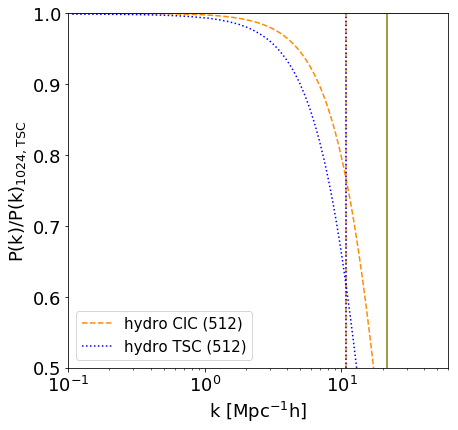

In [35]:
fig=plt.figure(figsize=(6.2,5.8))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.1 ,0.13,0.85,0.85])

ax1.axhline(y=1.0,c='gray',ls='-',lw=1.5)

ax1.axvline(x=cal_kNy(1024)/2., color='olive', linestyle='-')


#######################
ax1.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax1.plot(k512,PkCIC_hydro_512/PkTSC_hydro_1024[0:N512],c='darkorange'  ,label="hydro CIC (512)",ls='--')

ax1.axvline(x=cal_kNy(512)/2., color='b', linestyle=':')
ax1.plot(k512,PkTSC_hydro_512/PkTSC_hydro_1024[0:N512],c='b'  ,label="hydro TSC (512)",ls=':')

#######################


ax1.legend(loc="best",prop={'size': 15})

ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax1.set_ylabel(r'$\mathrm{P(k)/P(k)_{1024,TSC}}$')
ax1.set_xlim(0.1,60)
ax1.set_ylim(0.5,1.001)



In [ ]:
fig=plt.figure(figsize=(13,6))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.07 ,0.13,0.4,0.85])
ax2=fig.add_axes([0.57 ,0.13,0.4,0.85])

ax1.axvline(x=cal_kNy(1024)/2., color='blue', linestyle='-')
ax1.plot(Pk_dm_1024['k'],Pk_dm_1024['power']-Pk_dm_1024['shotnoise'],c='blue'  ,label="hydro dm (1024)")

ax1.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax1.plot(Pk_dm_512['k'],Pk_dm_512['power']-Pk_dm_512['shotnoise'],c='darkorange'  ,label="hydro dm (512)",ls='--')

ax1.axvline(x=cal_kNy(256)/2., color='r', linestyle='-.')
ax1.plot(Pk_dm_256['k'],Pk_dm_256['power']-Pk_dm_256['shotnoise'],c='r'  ,label="hydro dm (256)",ls='-.')

ax1.axvline(x=cal_kNy(128)/2., color='g', linestyle=':')
ax1.plot(Pk_dm_128['k'],Pk_dm_128['power']-Pk_dm_128['shotnoise'],c='g'  ,label="hydro dm (128)",ls=':')



ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')   
ax1.set_ylabel(r'$\mathrm{P(k)}$')
ax1.set_xlim(0.1,70)

ax1.legend(loc="lower left",prop={'size': 12})

ax2.axhline(y=1.0,c='gray',ls='-',lw=1.5)

ax2.axvline(x=cal_kNy(1024)/2., color='blue', linestyle='-')

N512 = len(Pk_dm_512['k'])
ax2.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax2.plot(Pk_dm_512['k'],(Pk_dm_512['power']-Pk_dm_512['shotnoise'])/(Pk_dm_1024['power']-Pk_dm_1024['shotnoise'])[0:N512],c='darkorange'  ,label="hydro dm (512)",ls='--')

N256 = len(Pk_dm_256['k'])
ax2.axvline(x=cal_kNy(256)/2., color='r', linestyle='-.')
ax2.plot(Pk_dm_256['k'],(Pk_dm_256['power']-Pk_dm_256['shotnoise'])/(Pk_dm_1024['power']-Pk_dm_1024['shotnoise'])[0:N256],c='r'  ,label="hydro dm (256)",ls='-.')

N128 = len(Pk_dm_128['k'])
ax2.axvline(x=cal_kNy(128)/2., color='g', linestyle=':')
ax2.plot(Pk_dm_128['k'],(Pk_dm_128['power']-Pk_dm_128['shotnoise'])/(Pk_dm_1024['power']-Pk_dm_1024['shotnoise'])[0:N128],c='g'  ,label="hydro dm (128)",ls=':')




ax2.legend(loc="best",prop={'size': 12})

ax2.set_xscale('log')
ax2.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax2.set_ylabel(r'$\mathrm{P(k)/P(k)_{1024}}$')
ax2.set_xlim(0.1,70)
#ax2.set_ylim(0.5,1.5)

(0.1, 70)

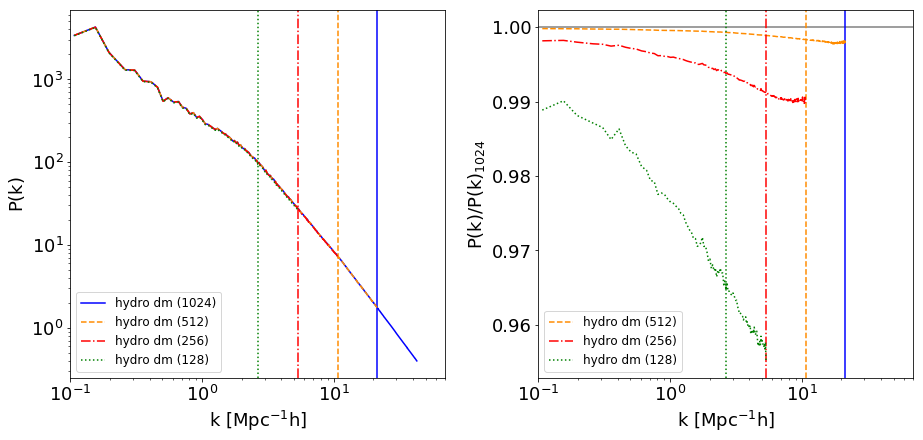

In [34]:
fig=plt.figure(figsize=(13,6))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.07 ,0.13,0.4,0.85])
ax2=fig.add_axes([0.57 ,0.13,0.4,0.85])

ax1.axvline(x=cal_kNy(1024)/2., color='blue', linestyle='-')
ax1.plot(Pk_dm_1024['k'],Pk_dm_1024['power']-Pk_dm_1024['shotnoise'],c='blue'  ,label="hydro dm (1024)")

ax1.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax1.plot(Pk_dm_512['k'],Pk_dm_512['power']-Pk_dm_512['shotnoise'],c='darkorange'  ,label="hydro dm (512)",ls='--')

ax1.axvline(x=cal_kNy(256)/2., color='r', linestyle='-.')
ax1.plot(Pk_dm_256['k'],Pk_dm_256['power']-Pk_dm_256['shotnoise'],c='r'  ,label="hydro dm (256)",ls='-.')

ax1.axvline(x=cal_kNy(128)/2., color='g', linestyle=':')
ax1.plot(Pk_dm_128['k'],Pk_dm_128['power']-Pk_dm_128['shotnoise'],c='g'  ,label="hydro dm (128)",ls=':')



ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')   
ax1.set_ylabel(r'$\mathrm{P(k)}$')
ax1.set_xlim(0.1,70)

ax1.legend(loc="lower left",prop={'size': 12})

ax2.axhline(y=1.0,c='gray',ls='-',lw=1.5)

ax2.axvline(x=cal_kNy(1024)/2., color='blue', linestyle='-')

N512 = len(Pk_dm_512['k'])
ax2.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax2.plot(Pk_dm_512['k'],(Pk_dm_512['power']-Pk_dm_512['shotnoise'])/(Pk_dm_1024['power']-Pk_dm_1024['shotnoise'])[0:N512],c='darkorange'  ,label="hydro dm (512)",ls='--')

N256 = len(Pk_dm_256['k'])
ax2.axvline(x=cal_kNy(256)/2., color='r', linestyle='-.')
ax2.plot(Pk_dm_256['k'],(Pk_dm_256['power']-Pk_dm_256['shotnoise'])/(Pk_dm_1024['power']-Pk_dm_1024['shotnoise'])[0:N256],c='r'  ,label="hydro dm (256)",ls='-.')

N128 = len(Pk_dm_128['k'])
ax2.axvline(x=cal_kNy(128)/2., color='g', linestyle=':')
ax2.plot(Pk_dm_128['k'],(Pk_dm_128['power']-Pk_dm_128['shotnoise'])/(Pk_dm_1024['power']-Pk_dm_1024['shotnoise'])[0:N128],c='g'  ,label="hydro dm (128)",ls=':')




ax2.legend(loc="best",prop={'size': 12})

ax2.set_xscale('log')
ax2.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax2.set_ylabel(r'$\mathrm{P(k)/P(k)_{1024}}$')
ax2.set_xlim(0.1,70)
#ax2.set_ylim(0.5,1.5)

(0.1, 70)

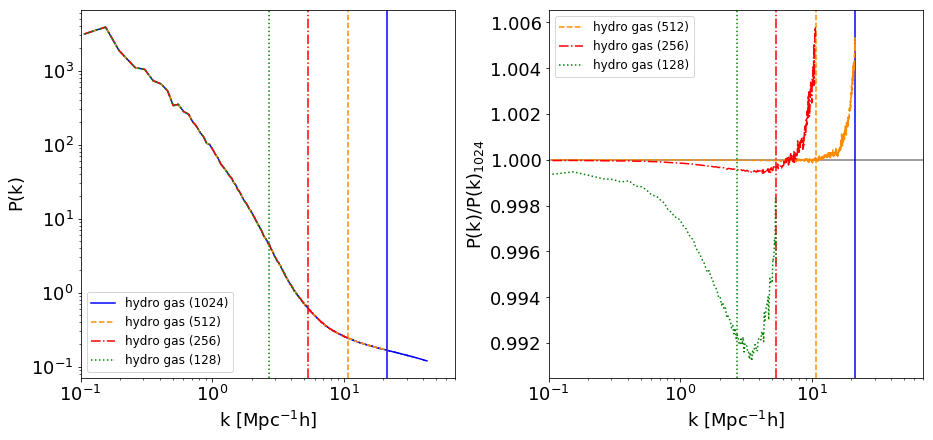

In [32]:
fig=plt.figure(figsize=(13,6))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.07 ,0.13,0.4,0.85])
ax2=fig.add_axes([0.57 ,0.13,0.4,0.85])

ax1.axvline(x=cal_kNy(1024)/2., color='blue', linestyle='-')
ax1.plot(Pk_gas_1024['k'],Pk_gas_1024['power']-Pk_gas_1024['shotnoise'],c='blue'  ,label="hydro gas (1024)")

ax1.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax1.plot(Pk_gas_512['k'],Pk_gas_512['power']-Pk_gas_512['shotnoise'],c='darkorange'  ,label="hydro gas (512)",ls='--')

ax1.axvline(x=cal_kNy(256)/2., color='r', linestyle='-.')
ax1.plot(Pk_gas_256['k'],Pk_gas_256['power']-Pk_gas_256['shotnoise'],c='r'  ,label="hydro gas (256)",ls='-.')

ax1.axvline(x=cal_kNy(128)/2., color='g', linestyle=':')
ax1.plot(Pk_gas_128['k'],Pk_gas_128['power']-Pk_gas_128['shotnoise'],c='g'  ,label="hydro gas (128)",ls=':')



ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')   
ax1.set_ylabel(r'$\mathrm{P(k)}$')
ax1.set_xlim(0.1,70)

ax1.legend(loc="lower left",prop={'size': 12})

ax2.axhline(y=1.0,c='gray',ls='-',lw=1.5)

ax2.axvline(x=cal_kNy(1024)/2., color='blue', linestyle='-')

N512 = len(Pk_gas_512['k'])
ax2.axvline(x=cal_kNy(512)/2., color='darkorange', linestyle='--')
ax2.plot(Pk_gas_512['k'],(Pk_gas_512['power']-Pk_gas_512['shotnoise'])/(Pk_gas_1024['power']-Pk_gas_1024['shotnoise'])[0:N512],c='darkorange'  ,label="hydro gas (512)",ls='--')

N256 = len(Pk_gas_256['k'])
ax2.axvline(x=cal_kNy(256)/2., color='r', linestyle='-.')
ax2.plot(Pk_gas_256['k'],(Pk_gas_256['power']-Pk_gas_256['shotnoise'])/(Pk_gas_1024['power']-Pk_gas_1024['shotnoise'])[0:N256],c='r'  ,label="hydro gas (256)",ls='-.')

N128 = len(Pk_gas_128['k'])
ax2.axvline(x=cal_kNy(128)/2., color='g', linestyle=':')
ax2.plot(Pk_gas_128['k'],(Pk_gas_128['power']-Pk_gas_128['shotnoise'])/(Pk_gas_1024['power']-Pk_gas_1024['shotnoise'])[0:N128],c='g'  ,label="hydro gas (128)",ls=':')




ax2.legend(loc="best",prop={'size': 12})

ax2.set_xscale('log')
ax2.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax2.set_ylabel(r'$\mathrm{P(k)/P(k)_{1024}}$')
ax2.set_xlim(0.1,70)
#ax2.set_ylim(0.5,1.5)

(0.7, 1.2)

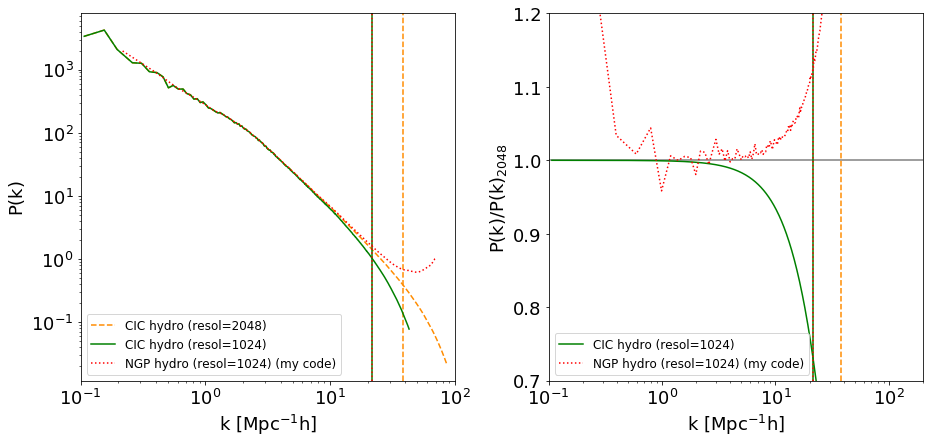

In [50]:
fig=plt.figure(figsize=(13,6))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.07 ,0.13,0.4,0.85])
ax2=fig.add_axes([0.57 ,0.13,0.4,0.85])

Pkcol = "Pk%03d"%snap

avgk    = TbPk_hydro["avgk"]
Nk      = TbPk_hydro["Nk1024"]
Pk_hydro=TbPk_hydro[Pkcol]
Pk_dmo  =TbPk_dmo[Pkcol]

logk    = TblogPkRatio["logk"]
logPkR  = TblogPkRatio[zcol]


#ax1.plot(avgk,Pk_dmo  ,c='r' ,label='NGP dmo (my code)')

#ax1.plot(PkCIC_135_dmo['k'], PkCIC_135_dmo['power'] - PkCIC_135_dmo['shotnoise'],c='r' ,label='CIC dmo',ls="--")
#ax1.plot(PkCIC_135_dmo_aF['k'], PkCIC_135_dmo_aF['power'] - PkCIC_135_dmo_aF['shotnoise'],c='royalblue' ,label='CIC dmo (alias off)',ls="--")
#ax1.plot(PkTSC_135_dmo['k'], PkTSC_135_dmo['power'] - PkTSC_135_dmo['shotnoise'],c='b' ,label='TSC dmo',ls=":")



ax1.axvline(x=cal_kNy(1820)/2., color='darkorange', linestyle='--')
ax1.plot(PkCIC_135_hydro2048['k'], PkCIC_135_hydro2048['power'] - PkCIC_135_hydro2048['shotnoise'],c='darkorange' ,label='CIC hydro (resol=2048)',ls="--")


ax1.axvline(x=cal_kNy(1024)/2., color='g', linestyle='-')
ax1.plot(PkCIC_135_hydro['k']    , PkCIC_135_hydro['power']     - PkCIC_135_hydro['shotnoise']    ,c='g' ,label='CIC hydro (resol=1024)',ls="-")

ax1.axvline(x=cal_kNy(1024)/2., color='r', linestyle=':')
ax1.plot(avgk,Pk_hydro,c='r'  ,label="NGP hydro (resol=1024) (my code)",ls=":")



#ax1.plot(PkCIC_135_hydro_aF['k'] , PkCIC_135_hydro_aF['power']  - PkCIC_135_hydro_aF['shotnoise'],c='royalblue' ,label='CIC hydro (alias off)',ls="--")
#ax1.plot(PkTSC_135_hydro['k']    , PkTSC_135_hydro['power']     - PkTSC_135_hydro['shotnoise']    ,c='r' ,label='TSC hydro',ls="--")


#ax1.plot(PkCIC_135_hydro_dm['k']  , PkCIC_hydro_dm  ,c='gray'  ,label='CIC hydro (dm)'  ,ls="-")
#ax1.plot(PkCIC_135_hydro_gas['k']  , PkCIC_hydro_gas  ,c='teal'  ,label='CIC hydro (gas)'  ,ls="--")
#ax1.plot(PkCIC_135_hydro_star['k'] , PkCIC_hydro_star ,c='violet',label='CIC hydro (star)' ,ls="--")
#ax1.plot(PkCIC_135_hydro_bh['k']   , PkCIC_hydro_bh   ,c='chocolate',label='CIC hydro (bh)',ls="--")



#ax1.axvline(x=k_Ny_dmo/2., color='darkorange', linestyle='-')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')   
ax1.set_ylabel(r'$\mathrm{P(k)}$')
ax1.set_xlim(0.1,100)

ax1.legend(loc="lower left",prop={'size': 12})

#ax2.plot(avgk,Pk_dmo/Pk_dmo,c='olive',label="illustris dmo",ls='-',lw=1.5)
#ax2.axhline(y=1.0,c='gray',ls='-',lw=1.5)
#ax2.plot(avgk,Pk_hydro/Pk_dmo,c='blue',label="NGP ratio",ls='-',lw=1.5)

#ax2.plot(PkCIC_135_hydro['k'], (PkCIC_135_hydro['power'] - PkCIC_135_hydro['shotnoise'])/(PkCIC_135_dmo['power'] - PkCIC_135_dmo['shotnoise']),c='g' ,label='CIC ratio',ls="--")
#ax2.plot(PkCIC_135_hydro['k'], (PkCIC_135_hydro['power'] )/(PkCIC_135_dmo['power']),c='g' ,label='CIC ratio',ls="--")


#ax2.plot(10**logk,10**logPkR,c='skyblue',label="data points from logPkR table",ls='-')
#ax2.axvline(x=k_Ny_dmo/2., color='darkorange', linestyle='-')

ax2.axhline(y=1.0,c='gray',ls='-',lw=1.5)

ax2.axvline(x=cal_kNy(1820)/2., color='darkorange', linestyle='--')

N1024=len(PkCIC_135_hydro['k'])
ax2.axvline(x=cal_kNy(1024)/2., color='g', linestyle='-')
ax2.plot(PkCIC_135_hydro['k']    , (PkCIC_135_hydro['power']     - PkCIC_135_hydro['shotnoise'])/(PkCIC_135_hydro2048['power'] - PkCIC_135_hydro2048['shotnoise'])[0:N1024]    ,c='g' ,label='CIC hydro (resol=1024)',ls="-")

truth1 = spline(PkCIC_135_hydro2048['k'], PkCIC_135_hydro2048['power'] - PkCIC_135_hydro2048['shotnoise'])

ax2.axvline(x=cal_kNy(1024)/2., color='r', linestyle=':')
ax2.plot(avgk    , Pk_hydro/truth1(avgk)    ,c='r' ,label='NGP hydro (resol=1024) (my code)',ls=":")



ax2.legend(loc="best",prop={'size': 12})

ax2.set_xscale('log')
ax2.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax2.set_ylabel(r'$\mathrm{P(k)/P(k)_{2048}}$')
ax2.set_xlim(0.1,200)
ax2.set_ylim(0.7,1.2)

In [34]:
PkCIC_135_hydro['shotnoise']

5.119810336093671e-05

(0.995, 1.02)

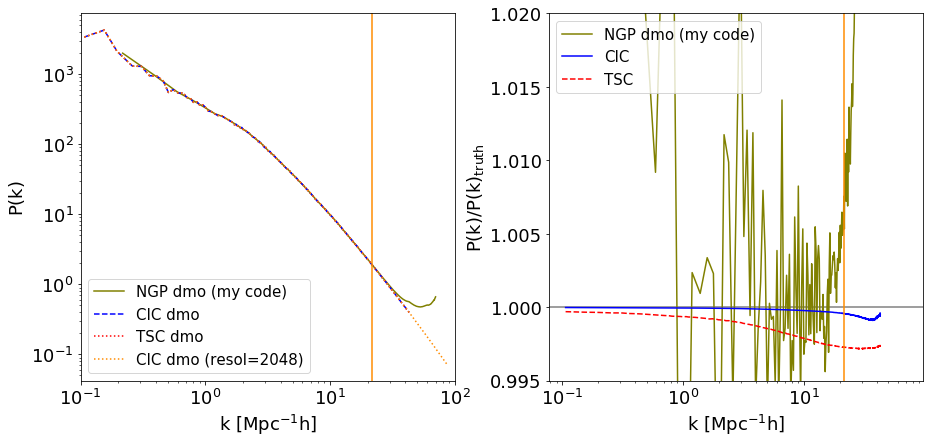

In [48]:
fig=plt.figure(figsize=(13,6))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.07 ,0.13,0.4,0.85])
ax2=fig.add_axes([0.57 ,0.13,0.4,0.85])

Pkcol = "Pk%03d"%snap

avgk    = TbPk_hydro["avgk"]
Nk      = TbPk_hydro["Nk1024"]
Pk_hydro=TbPk_hydro[Pkcol]
Pk_dmo  =TbPk_dmo[Pkcol]

logk    = TblogPkRatio["logk"]
logPkR  = TblogPkRatio[zcol]




ax1.plot(avgk,Pk_dmo  ,c='olive' ,label='NGP dmo (my code)')
ax1.plot(PkCIC_135_dmo['k']   , PkCIC_dmo    , c='b'         ,label='CIC dmo',ls="--")
#ax1.plot(PkCIC_135_dmo_aF['k'], PkCIC_dmo_aF , c='royalblue' ,label='CIC dmo (alias off)',ls="--")
ax1.plot(PkTSC_135_dmo['k']   , PkTSC_dmo    , c='r'         ,label='TSC dmo',ls=":")
ax1.plot(PkCIC_135_dmo2048['k'],PkCIC_dmo2048 , c='darkorange',label='CIC dmo (resol=2048)',ls=":")


#ax1.plot(avgk,Pk_hydro,c='blue',label="NGP hydro (my code)")
#ax1.plot(PkCIC_135_hydro['k']    ,PkCIC_hydro     , c='g'         ,label='CIC hydro',ls="--")
#ax1.plot(PkCIC_135_hydro_aF['k'] ,PkCIC_hydro_aF  , c='royalblue' ,label='CIC hydro (alias off)',ls="--")
#ax1.plot(PkTSC_135_hydro['k']    ,PkTSC_hydro     , c='r'         ,label='TSC hydro',ls="--")
#ax1.plot(PkCIC_135_hydro2048['k'],PkCIC_hydro2048 , c='darkorange',label='CIC hydro (resol=2048)',ls=":")


ax1.axvline(x=k_Ny_dmo/2., color='darkorange', linestyle='-')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')   
ax1.set_ylabel(r'$\mathrm{P(k)}$')
ax1.set_xlim(0.1,100)

ax1.legend(loc="lower left",prop={'size': 15})

#ax2.plot(avgk,Pk_dmo/Pk_dmo,c='olive',label="illustris dmo",ls='-',lw=1.5)
ax2.axhline(y=1.0,c='gray',ls='-',lw=1.5)


k = PkCIC_135_hydro['k']
Npt = len(k)

#ax2.plot(k,PkCIC_hydro/PkCIC_hydro2048[0:Npt],c='g',label="CIC",ls='-',lw=1.5)
#ax2.plot(k,PkCIC_hydro_aF/PkCIC_hydro2048[0:Npt],c='royalblue',label="CIC (alias off)",ls='--',lw=1.5)
#ax2.plot(k,PkTSC_hydro/PkCIC_hydro2048[0:Npt],c='r',label="TSC",ls='--',lw=1.5)

truth_dmo = spline(PkCIC_135_dmo2048['k'], PkCIC_135_dmo2048['power'] - PkCIC_135_dmo2048['shotnoise'])

ax2.plot(avgk,Pk_dmo/truth_dmo(avgk)  ,c='olive' ,label='NGP dmo (my code)')

ax2.plot(k,PkCIC_dmo/truth_dmo(k),c='b',label="CIC",ls='-',lw=1.5)
#ax2.plot(k,PkCIC_dmo_aF/PkCIC_dmo2048[0:Npt],c='royalblue',label="CIC (alias off)",ls='--',lw=1.5)
ax2.plot(k,PkTSC_dmo/truth_dmo(k),c='r',label="TSC",ls='--',lw=1.5)



ax2.axvline(x=k_Ny_dmo/2., color='darkorange', linestyle='-')

ax2.legend(loc="best",prop={'size': 15})

ax2.set_xscale('log')
ax2.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax2.set_ylabel(r'$\mathrm{P(k)/P(k)_{truth}}$')
#ax2.set_xlim(0.1,200)
ax2.set_ylim(0.995,1.02)